___
## Manipulación de Datos Espaciales (`GeoDataFrames`)
Una vez teniendo el conocimiento de cómo visualizar la información espacial, es posible estudiar cómo puede ser combinada con las operaciones aprendidas en sesiones pasadas sobre la manipulación de datos tabulares no espaciales. En esencia, la clave es entender que un `GeoDataFrame` contiene la mayoría de su información espacial en una sola columna llamada `geometry`, teniendo el resto de la tabla la misma apariencia y comportamiento que un `DataFrame` no espacial, lo que les concede toda la flexibilidad y conveniencia estudiada en la manipulación, segmentación y transformación de datos tabulares; además de ello, la naturaleza de un `GeoDataFrame` también incorpora un conjunto de operaciones explícitamente espaciales para combinar y transformar los datos. En esta sección, ambos tipos de operaciones serán consideradas.

Primero, vale la pena repasar algunas de las técnicas aprendidas en sesiones pasadas sobre datos no espaciales, y entender cómo pueden ser combinados con el mapeo de sus contrapartes espaciales. Para esto, se utilizarán los datos de población abordados anteriormente:

In [ ]:
import pandas as pd

# Importar la tabla
poblacion = pd.read_csv(f + 'poblacion_cdmx.csv' , index_col = 'ageb_urbana_cvegeo')

# Visualizar la tabla
poblacion.head()

pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900200010010            71       77       235        129        137   
0900200010025           206      241       466        212        261   
090020001003A           157      137       347        202        197   
0900200010044           148      162       391        178        203   
0900200010097            56       82       150         80         88   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  
ageb_urbana_cvegeo                                                          
0900200010010             298        182       1055        293         822  
0900200010025             622        426       1705        699         974  
090020001003A             478        273       1395        370         902  
0900200010044             459        365       1422        469         993  
0900200010097             202        157        626        248         523

### Unión de Tablas
En la práctica se han importado dos tablas importantes: por una parte, toda la información espacial está contenida en la tabla `agebs`, mientras que los datos tabulares se encuentran contenidos en `poblacion`. Para trabajar con ambos, es necesario *conectar* las tablas; en idioma de `pandas`, esto recibe el nombre de `join` (*Unión*), siendo los elementos claves para la unión los *índices* de cada tabla, esto es, los nombres asignados a cada fila; esto es lo que se determina utilizando el argumento `index_col` al momento de importar un `.csv`.

Tanto en el caso de `agebs` como de `poblacion`, el índice corresponde a la Clave Geográfica (CVEGEO) de cada una de las AGEB's, lo cual permite ejecutar el `join` de la siguiente manera:

In [ ]:
ageb_pob = agebs.join(poblacion , on = 'ageb_urbana_cvegeo')
ageb_pob.head()

geometry  \
ageb_urbana_cvegeo                                                      
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...   
0900300011533       MULTIPOLYGON (((-99.18010 19.30772, -99.17845 ...   
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...   
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.20630 ...   
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...   

                    pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900700013628            40       45       104         48         49   
0900300011533             0        0         0          0          0   
0901500010235            29       37        87         57         47   
0900200010097            56       82       150         80         88   
0900200011184            38       54        84         50         65   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  
ageb_urbana_cvegeo                                                          
0900700013628             126         96        345        144         133  
0900300011533               0          0          0          0           0  
0901500010235             152        111        396        178         229  
0900200010097             202        157        626        248         523  
0900200011184             144        112        416        187         239

Analizando un poco la lógica detrás de la operación `.join()`:
* En primer lugar, se trata de una operación en la que se está "anexando" un conjunto de datos a uno ya existente. En este caso en particular, se anexan los datos de población contenidos en la tabla `poblacion` a la tabla espacial `agebs`.
* La tabla que se está anexando (`población`) necesita tener sus índices bien definidos para que la operación pueda proceder correctamente. En este caso, los índices fueron asignados desde la importación de la tabla, por lo que se trata de un requerimiento ya cumplido.
* La función `.join()` posee dos argumentos: el primero, referente a la tabla que se está anexando; el segundo, determinado por `on`, determina el nombre de la columna o del índice de la tabla principal que servirá como referencia para la unión.

### Manipulaciones No Espaciales
Una vez unidos los datos espaciales con los no espaciales, pueden utilizarse las técnicas aprendidas en la manipulación y segmentación de tablas no espaciales para crear mapas más complejos. En particular, se utilizarán las funciones requeridas para seleccionar filas basándose en las características de su población, añadiendo la posibilidad de visualizarlas en un mapa.

En primer lugar, puede generarse nuevamente la columna que contiene la Población Total de cada AGEB replicando los comandos ya aprendidos:

In [ ]:
ageb_pob['pob_total'] = poblacion.sum(axis = 1)
ageb_pob.head()

geometry  \
ageb_urbana_cvegeo                                                      
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...   
0900300011533       MULTIPOLYGON (((-99.18010 19.30772, -99.17845 ...   
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...   
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.20630 ...   
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...   

                    pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900700013628            40       45       104         48         49   
0900300011533             0        0         0          0          0   
0901500010235            29       37        87         57         47   
0900200010097            56       82       150         80         88   
0900200011184            38       54        84         50         65   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  \
ageb_urbana_cvegeo                                                           
0900700013628             126         96        345        144         133   
0900300011533               0          0          0          0           0   
0901500010235             152        111        396        178         229   
0900200010097             202        157        626        248         523   
0900200011184             144        112        416        187         239   

                    pob_total  
ageb_urbana_cvegeo             
0900700013628            1130  
0900300011533               0  
0901500010235            1323  
0900200010097            2212  
0900200011184            1389

Posteriormente, se seleccionan las 10 AGEB's con la mayor cantidad de población, a través de la función `.sort_values()` y añadiendo el valor de la selección deseado a `.head()`:

In [ ]:
agebs_mas_pobladas = ageb_pob.sort_values('pob_total', ascending = False).head(10)

Ahora, puede crearse un mapa de la Ciuda de México y sobreponer como una nueva capa estas áreas:

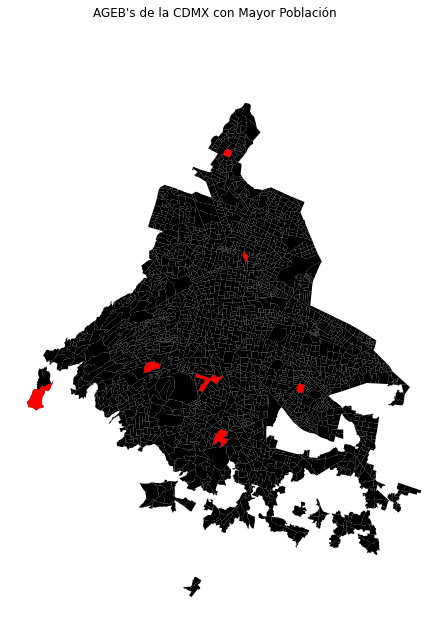

In [ ]:
fig, fila = plt.subplots(1, figsize=(10, 10))
ageb_pob.plot(facecolor='black', linewidth=0.025, ax=fila)              # Capa Base de AGEB's
agebs_mas_pobladas.plot(alpha=1, facecolor='red', linewidth=0, ax=fila) # Capa AGEB's más pobladas
fila.set_axis_off()
fig.suptitle("AGEB's de la CDMX con Mayor Población")
plt.show()

### Manipulaciones Espaciales
Además de las operaciones basadas únicamente en valores, como las realizadas anteriormente, es posible realizar sobre un `GeoDataFrame` una gran variedad de operaciones encontradas en los SIG. A continuación se detallarán algunas de las más comunes

#### Cálculo de Centroides
En algunos casos, resulta útil simplificar un polígono en un sólo punto y, para ello, se calculan los Centroides (siendo algo como el análogo espacial de la media estadística). El siguiente comando dará como resultado un objeto del tipo `GeoSeries` (una sola columna con datos espaciales) con los Centroides de los polígonos contenidos en un `GeoDataFrame`:

In [ ]:
centroides = ageb_pob.centroid
centroides.head()

/tmp/ipykernel_498/4168445328.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroides = ageb_pob.centroid


ageb_urbana_cvegeo
0900700013628    POINT (-99.03839 19.39066)
0900300011533    POINT (-99.17801 19.30761)
0901500010235    POINT (-99.14579 19.45542)
0900200010097    POINT (-99.20697 19.50685)
0900200011184    POINT (-99.20608 19.50239)
dtype: geometry

Es importante destacar que `centroides` no es una tabla completa, sino una sola columna, esto es, un objeto del tipo `GeoSeries`; esto brinda la posibilidad de graficarlo de forma similar a como se ha hecho anteriormente:

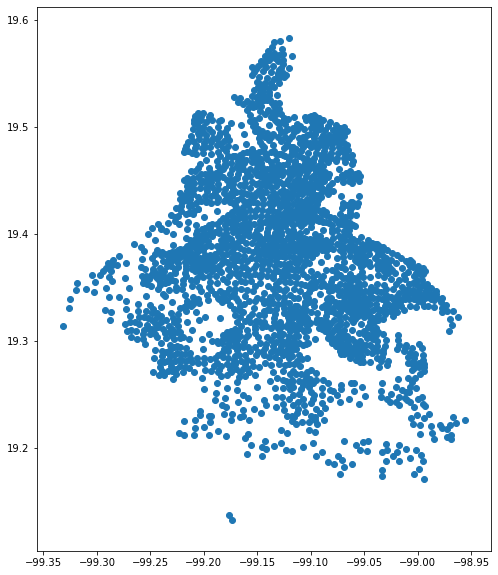

In [ ]:
centroides.plot(figsize = (10,10))

En el caso de un objeto del tipo `GeoSeries`, ya no es necesario hacer referencia a la columna `geometry` para inspeccionar su contenido, ya que, al tratarse de una columna de datos espaciales, el objetivo es en sí la geometría.

#### Point-In-Polygon (PiP)
El saber si un punto se encuentra dentro de un polígono es un ejercicio simple desde el punto de vista conceptual; sin embargo, al momento de trasladarlo a la programación, puede tratarse de una acción difícil de completar. La forma más sencilla de realizar esto en `GeoPandas` es a través del método `.contains()`, disponible para todo polígono.

In [ ]:
poligono = ageb_pob['geometry'][0]  # Se aisla el primer polígono dela tabla
punto1 = centroides[0]              # Se aisla el primer punto de la serie
punto2 = centroides[1]              # Se aisla el segundo punto de la serie

In [ ]:
poligono.contains(punto1)

True

In [ ]:
poligono.contains(punto2)

False

El método anterior permite realizar una verificación rápida y cualitativa de si un punto se encuentra dentro de un polígono; sin embargo, en muchos otros casos esto no resulta ser muy eficiente, por lo que se recurre a una operación conocida como *Spatial Join*; éstos serán estudiados más a fondo en futuras prácticas.

#### Buffers
Los Buffers son parte de las operaciones clásicas de un SIG, y consisten en trazar un área alrededor de una geometría en particular, dado un radio específico. Éstos resultan bastate útiles al momento de combinarlos, por ejemplo, con operaciones de *Point-In-Polygon* para calcular valores de accesibilidad, áreas de influencia, entre otros.

Para crear un Buffer a través de `GeoPandas`, puede utilizarse el método `.buffer()`, al cual se le coloca como argumento el radio deseado. Es importante tomar en cuenta que el radio especificado necesita encontrarse en las mismas unidades que el Sistema de Coordenadas de Referencia (CRS) de la geometría con la que se esté trabajando. Por ejemplo, revisando la capa importada anteriormente de Estaciones del Metro:

In [ ]:
estaciones.crs

<Derived Projected CRS: EPSG:32614>
Name: WGS 84 / UTM zone 14N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°W and 96°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - Manitoba; Nunavut; Saskatchewan. Mexico. United States (USA).
- bounds: (-102.0, 0.0, -96.0, 84.0)
Coordinate Operation:
- name: UTM zone 14N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

La propiedad `crs` indica que se trata de la proyección con Código EPSG 32614, de la cual, [al investigar sobre ella](http://epsg.io/32614), se tiene que se trata de una proyección que trabaja en metros. Como tal, si se buscara generar un Buffer de 500m alrededor de cada estación, simplemente se tendría que:

In [ ]:
buff = estaciones.buffer(500)
buff.head()

0    POLYGON ((485905.843 2149860.572, 485903.435 2...
1    POLYGON ((486208.110 2152724.378, 486205.702 2...
2    POLYGON ((480784.558 2142470.874, 480782.151 2...
3    POLYGON ((487661.939 2146081.726, 487659.532 2...
4    POLYGON ((480876.875 2142406.938, 480874.468 2...
dtype: geometry

Para representar éstos en un mapa, se recurre a los métodos estudiados anteriormente:

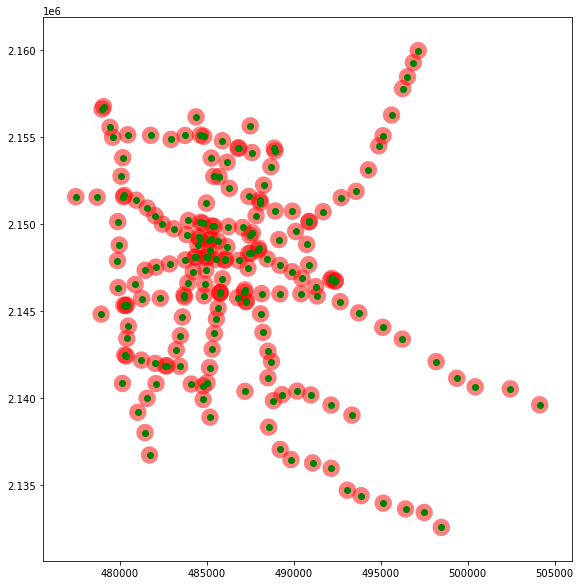

In [ ]:
fig, fila = plt.subplots(1, figsize=(10, 10))

# Graficar los Buffers
buff.plot(ax = fila , alpha = 0.5 , facecolor = 'red', linewidth = 0)

# Graficar las Estaciones de Metro sobre las referencias
estaciones.plot(ax = fila , color = 'green')
plt.show()

#### Ejercicio Opcional
Genera un mapa de la Ciudad de México donde los polígonos de las AGEB's sean de color negro, y sobre ellos y de color amarillo los Buffers a 250m de cada uno de sus centroides.

### Coropletas

Para terminar la práctica de geovisualización vamos a hacer mapas de coropletas usando dos métodos diferentes. Primero vamos a usar directamente GeoPandas para generar los mapas y después vamos a usar [ipyLeaflet](https://ipyleaflet.readthedocs.io/en/latest/) para hacer una visualización interactiva.

Primero, recordemos que ya tenemos los datos de población unidos a las geometrías de las AGEBS

In [ ]:
ageb_pob

geometry  \
ageb_urbana_cvegeo                                                      
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...   
0900300011533       MULTIPOLYGON (((-99.18010 19.30772, -99.17845 ...   
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...   
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.20630 ...   
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...   
...                                                               ...   
0901700011469       MULTIPOLYGON (((-99.06175 19.42993, -99.06174 ...   
0901700011473       MULTIPOLYGON (((-99.06098 19.42894, -99.06098 ...   
0901700011488       MULTIPOLYGON (((-99.05931 19.42789, -99.05934 ...   
0901700011492       MULTIPOLYGON (((-99.05931 19.42789, -99.05794 ...   
0901700011524       MULTIPOLYGON (((-99.05709 19.42377, -99.05723 ...   

                    pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900700013628            40       45       104         48         49   
0900300011533             0        0         0          0          0   
0901500010235            29       37        87         57         47   
0900200010097            56       82       150         80         88   
0900200011184            38       54        84         50         65   
...                     ...      ...       ...        ...        ...   
0901700011469            88       79       165         64         84   
0901700011473            81       81       127         71         61   
0901700011488            80       83       133         62         72   
0901700011492            67       52       122         54         59   
0901700011524           191      211       434        235        233   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  \
ageb_urbana_cvegeo                                                           
0900700013628             126         96        345        144         133   
0900300011533               0          0          0          0           0   
0901500010235             152        111        396        178         229   
0900200010097             202        157        626        248         523   
0900200011184             144        112        416        187         239   
...                       ...        ...        ...        ...         ...   
0901700011469             199        132        367        117          61   
0901700011473             175        100        332         98          53   
0901700011488             185        128        317        134          51   
0901700011492             139         94        271         66          59   
0901700011524             559        343       1388        419         537   

                    pob_total  
ageb_urbana_cvegeo             
0900700013628            1130  
0900300011533               0  
0901500010235            1323  
0900200010097            2212  
0900200011184            1389  
...                       ...  
0901700011469            1356  
0901700011473            1179  
0901700011488            1245  
0901700011492             983  
0901700011524            4550  

[2432 rows x 12 columns]

Hacer un primer mapa sencillo usando GeoPandas es tan sencillo como pasarle el nombre de la columna que queremos usar para colorear el mapa

<AxesSubplot:>

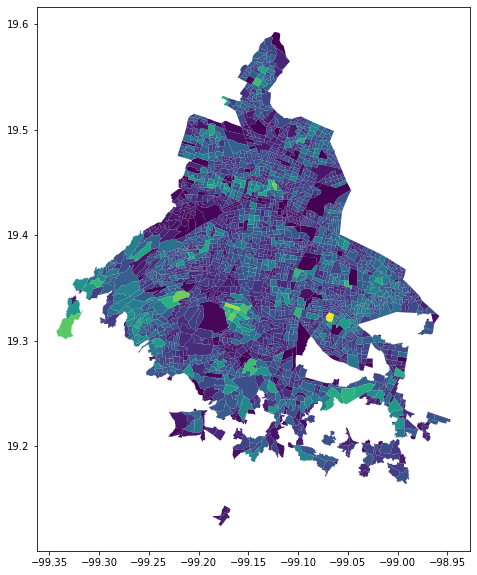

In [ ]:
ageb_pob.plot('pob_total', figsize=(10,10))

Incluir una leyenda también es muy sencillo

<AxesSubplot:>

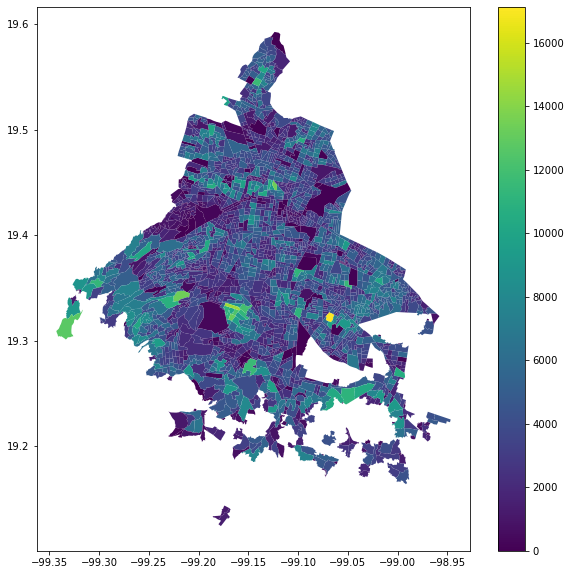

In [ ]:
ageb_pob.plot('pob_total', figsize=(10,10), legend=True)

Y cambiar la paleta de colores

<AxesSubplot:>

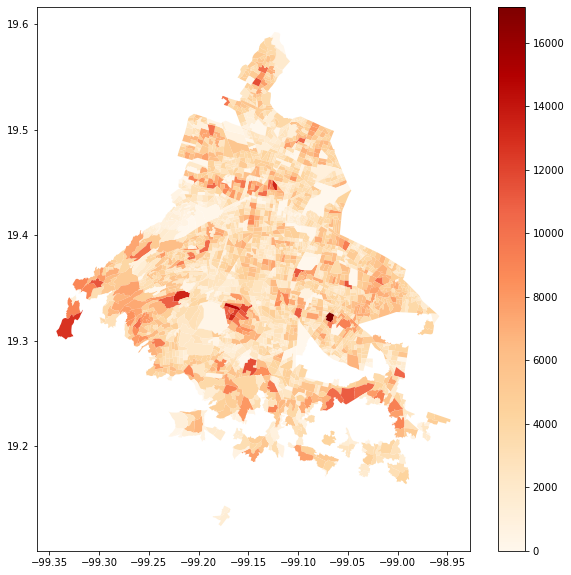

In [ ]:
ageb_pob.plot('pob_total', figsize=(10,10), legend=True, cmap='OrRd')

En la documentación de [GeoDtaFrame.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) pueden ver la lista completa de opciones.

En estos primeros mapas que hemos hecho usamos una escala continua para representar la variable de interés. Otra forma de representar la variación espacial es utilizando un esquema de clasificación discreto sobre nuestra variable de interés, por ejemplo cuantiles, intervalos iguales, etcétera. Para esto, `GeoDtaFrame.plot()` admite pasarle el parámetro `scheme` que toma cualquier esquema de clasificación admitido por [mapclassify](https://github.com/pysal/mapclassify).

<AxesSubplot:>

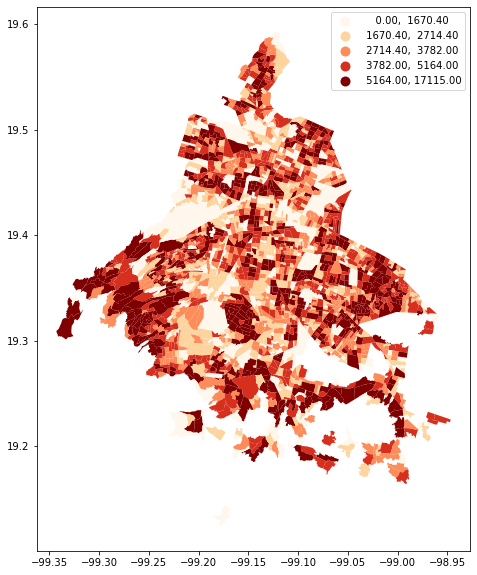

In [ ]:
ageb_pob.plot('pob_total', figsize=(10,10), legend=True, cmap='OrRd', scheme='quantiles')

#### Ejercicio

Prueben diferentes esquemas de clasificación ([aquí](https://geopandas.org/en/stable/docs/user_guide/mapping.html) pueden encontrar la lista de esquemas disponibles) y discutanb sobre qué esquema representa mejor la variación espacial de los datos 

### Mejorando el estilo

Los mapas que hemos hecho son relativamente sencillos, para darles una mejor presentación podemos tomar algunas cosas que ya hemos aprendido, por ejemplo eliminar los ejes y ponerles un título:

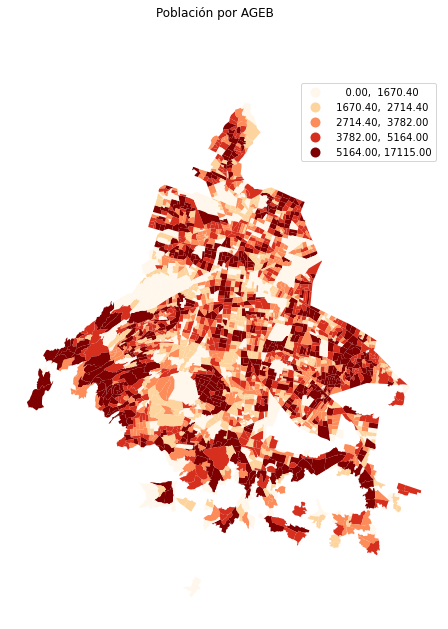

In [ ]:
fig , fila = plt.subplots(1, figsize=(10,10))
ageb_pob.plot('pob_total', figsize=(10,10), legend=True, cmap='OrRd', scheme='quantiles', ax=fila)
fig.suptitle("Población por AGEB")
fila.set_axis_off()  
plt.show()

También es posible agregar un mapa base utilizando la librería [contextily](https://contextily.readthedocs.io/en/latest/)

In [ ]:
import contextily as ctx

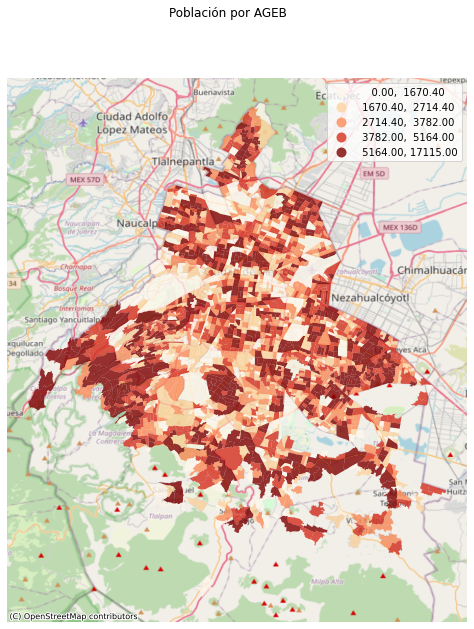

In [ ]:
fig , fila = plt.subplots(1, figsize=(10,10))
ageb_pob.plot('pob_total', figsize=(10,10), legend=True, cmap='OrRd', scheme='quantiles', ax=fila, alpha=0.8)
fig.suptitle("Población por AGEB")
fila.set_axis_off()
ctx.add_basemap(fila, source=ctx.providers.OpenStreetMap.Mapnik, crs=ageb_pob.crs.to_string())
plt.show()

#### Ejercicio

Prueben usando diferentes mapas base, y cambiando el fondo de la imágen.

### Varios mapas en la misma figura

A veces queremos hacer una imagen que nos permita comparar rápidamente una variable, para eso es conveniente poner juntos dos mapas. Pensemos en este momento en comparar la población por AGEB con la densidad de población por AGEB. Obviamente el pri er paso es calcular la densidad de población, para esto vamos a usar la propiedad `área` de los GeoDataFrames. Fíjense como reproyectamos antes de calcular el area para obtener un valor en metros cuadrados

In [ ]:
ageb_pob.to_crs(32614).area

ageb_urbana_cvegeo
0900700013628     37323.787352
0900300011533     91454.392482
0901500010235     31110.848381
0900200010097    178129.071473
0900200011184     48626.677816
                     ...      
0901700011469     22976.721781
0901700011473     19149.811749
0901700011488     22732.498079
0901700011492     25787.042294
0901700011524    223050.891018
Length: 2432, dtype: float64

In [ ]:
ageb_pob['densidad_pob'] = ageb_pob['pob_total'] / ageb_pob.to_crs(32614).area
ageb_pob.head()

geometry  \
ageb_urbana_cvegeo                                                      
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...   
0900300011533       MULTIPOLYGON (((-99.18010 19.30772, -99.17845 ...   
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...   
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.20630 ...   
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...   

                    pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900700013628            40       45       104         48         49   
0900300011533             0        0         0          0          0   
0901500010235            29       37        87         57         47   
0900200010097            56       82       150         80         88   
0900200011184            38       54        84         50         65   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  \
ageb_urbana_cvegeo                                                           
0900700013628             126         96        345        144         133   
0900300011533               0          0          0          0           0   
0901500010235             152        111        396        178         229   
0900200010097             202        157        626        248         523   
0900200011184             144        112        416        187         239   

                    pob_total  densidad_pob  
ageb_urbana_cvegeo                           
0900700013628            1130      0.030276  
0900300011533               0      0.000000  
0901500010235            1323      0.042525  
0900200010097            2212      0.012418  
0900200011184            1389      0.028565

Ahora sí podemos hacer una figura que incluya dos mapas. Hasta ahora siempre hemos usado `fig , fila = plt.subplots(1, figsize=(10,10))` para hacer un subplot con una sóla gráfica, lo que vamos a hacer es usarlo ahora para obtener dos ejes en los que graficar.

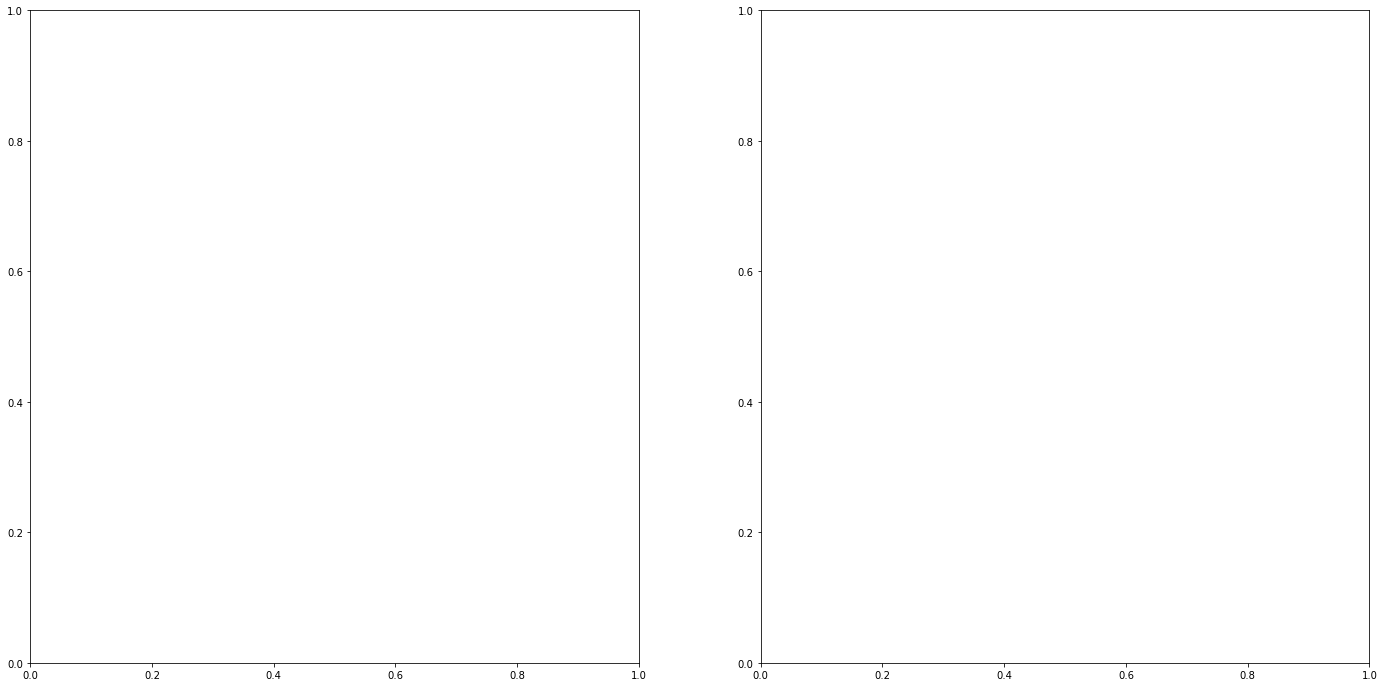

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,12)) # Pedimos subfiguras con un renglón y dos columnas

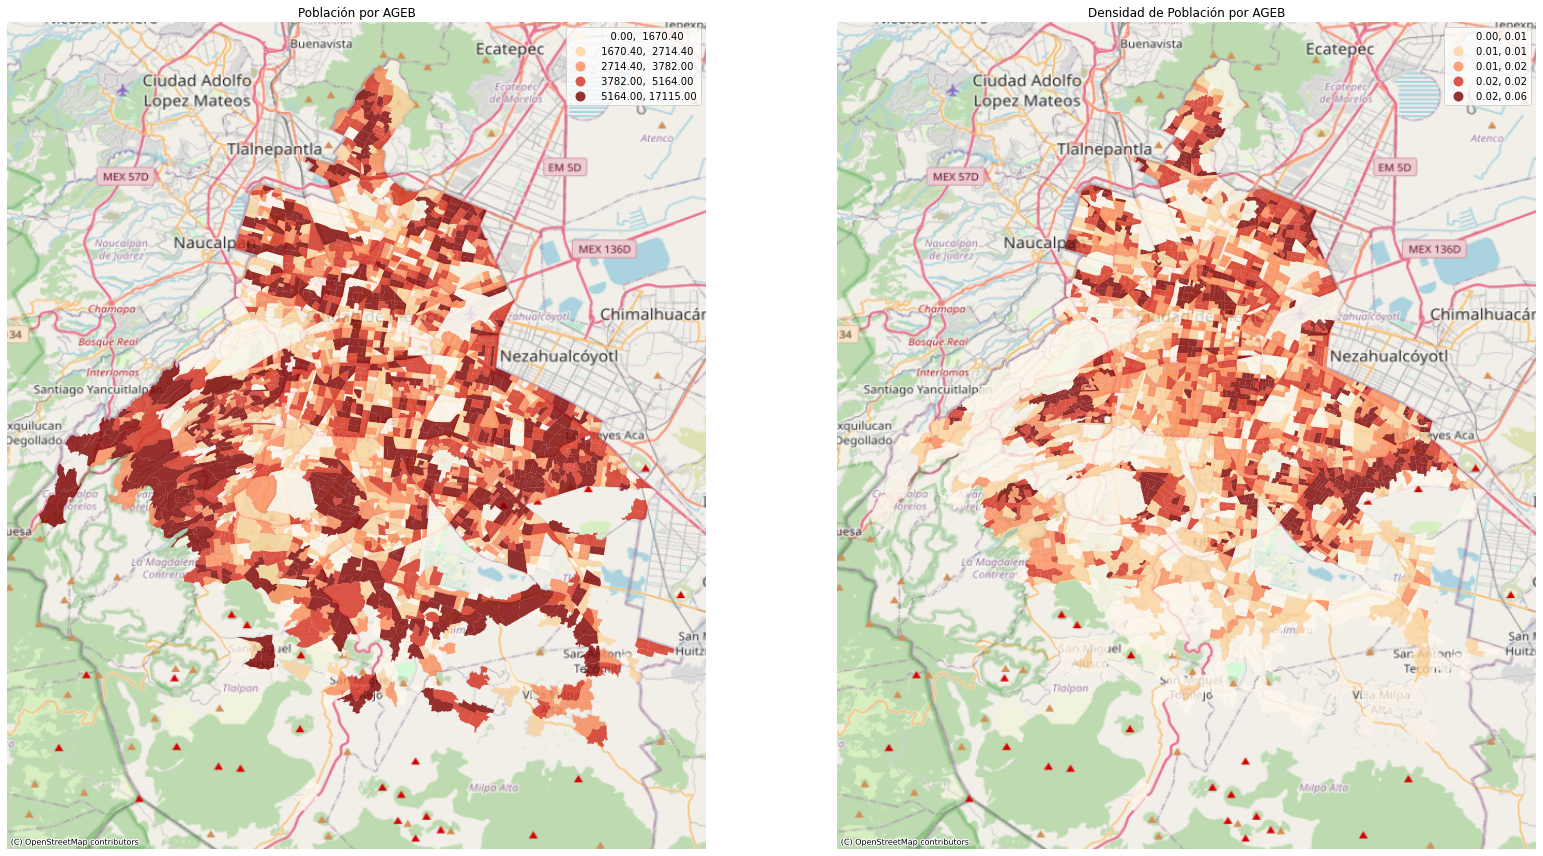

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(24,12))# Pedimos subfiguras con un renglón y dos columnas
ageb_pob.plot('pob_total', legend=True, cmap='OrRd', scheme='quantiles', ax=ax1, alpha=0.8)# Graficamos en el primer ax
ax1.set_title("Población por AGEB") # Este título está en el nivel ax, no en el figure
ax1.set_axis_off()
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik, crs=ageb_pob.crs.to_string())
ageb_pob.plot('densidad_pob', legend=True, cmap='OrRd', scheme='quantiles', ax=ax2, alpha=0.8)# Graficamos en el segndo ax
ax2.set_title("Densidad de Población por AGEB") # Este título está en el nivel ax, no en el figure
ax2.set_axis_off()
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik, crs=ageb_pob.crs.to_string())
plt.tight_layout() # Para disminuir el espacio entre gráficas

Como pueden ver es relatívamente fácil poner dos gráficas, sólo hay que especificar cómo las queremos organizar y entender que `subplots` nos va a regresar un `array` de ejes. Para que quede aún más claro, vamos a hacer ahora cuatro mapas, comparando los porcentajes de poblaión para distintos grupos de edad. Primero vamos a calcular las variables que vamos a mapear

In [ ]:
ageb_pob['prop_0a2'] = ageb_pob['pob_0a2'] / ageb_pob['pob_total']
ageb_pob['prop_12a14'] = ageb_pob['pob_12a14'] / ageb_pob['pob_total']
ageb_pob['prop_18a24'] = ageb_pob['pob_18a24'] / ageb_pob['pob_total']
ageb_pob['prop_60ymas'] = ageb_pob['pob_60ymas'] / ageb_pob['pob_total']
ageb_pob.head()

geometry  \
ageb_urbana_cvegeo                                                      
0900700013628       MULTIPOLYGON (((-99.03887 19.39128, -99.03851 ...   
0900300011533       MULTIPOLYGON (((-99.18010 19.30772, -99.17845 ...   
0901500010235       MULTIPOLYGON (((-99.14495 19.45625, -99.14536 ...   
0900200010097       MULTIPOLYGON (((-99.20573 19.50454, -99.20630 ...   
0900200011184       MULTIPOLYGON (((-99.20723 19.50387, -99.20652 ...   

                    pob_0a2  pob_3a5  pob_6a11  pob_12a14  pob_15a17  \
ageb_urbana_cvegeo                                                     
0900700013628            40       45       104         48         49   
0900300011533             0        0         0          0          0   
0901500010235            29       37        87         57         47   
0900200010097            56       82       150         80         88   
0900200011184            38       54        84         50         65   

                    pob_18a24  pob_25a29  pob_30a49  pob_50a59  pob_60ymas  \
ageb_urbana_cvegeo                                                           
0900700013628             126         96        345        144         133   
0900300011533               0          0          0          0           0   
0901500010235             152        111        396        178         229   
0900200010097             202        157        626        248         523   
0900200011184             144        112        416        187         239   

                    pob_total  densidad_pob  prop_0a2  prop_12a14  prop_18a24  \
ageb_urbana_cvegeo                                                              
0900700013628            1130      0.030276  0.035398    0.042478    0.111504   
0900300011533               0      0.000000       NaN         NaN         NaN   
0901500010235            1323      0.042525  0.021920    0.043084    0.114890   
0900200010097            2212      0.012418  0.025316    0.036166    0.091320   
0900200011184            1389      0.028565  0.027358    0.035997    0.103672   

                    prop_60ymas  
ageb_urbana_cvegeo               
0900700013628          0.117699  
0900300011533               NaN  
0901500010235          0.173091  
0900200010097          0.236438  
0900200011184          0.172066

Ahora vamos a hacer un _layout_ con cuatro subplots en dos renglones y dos columnas

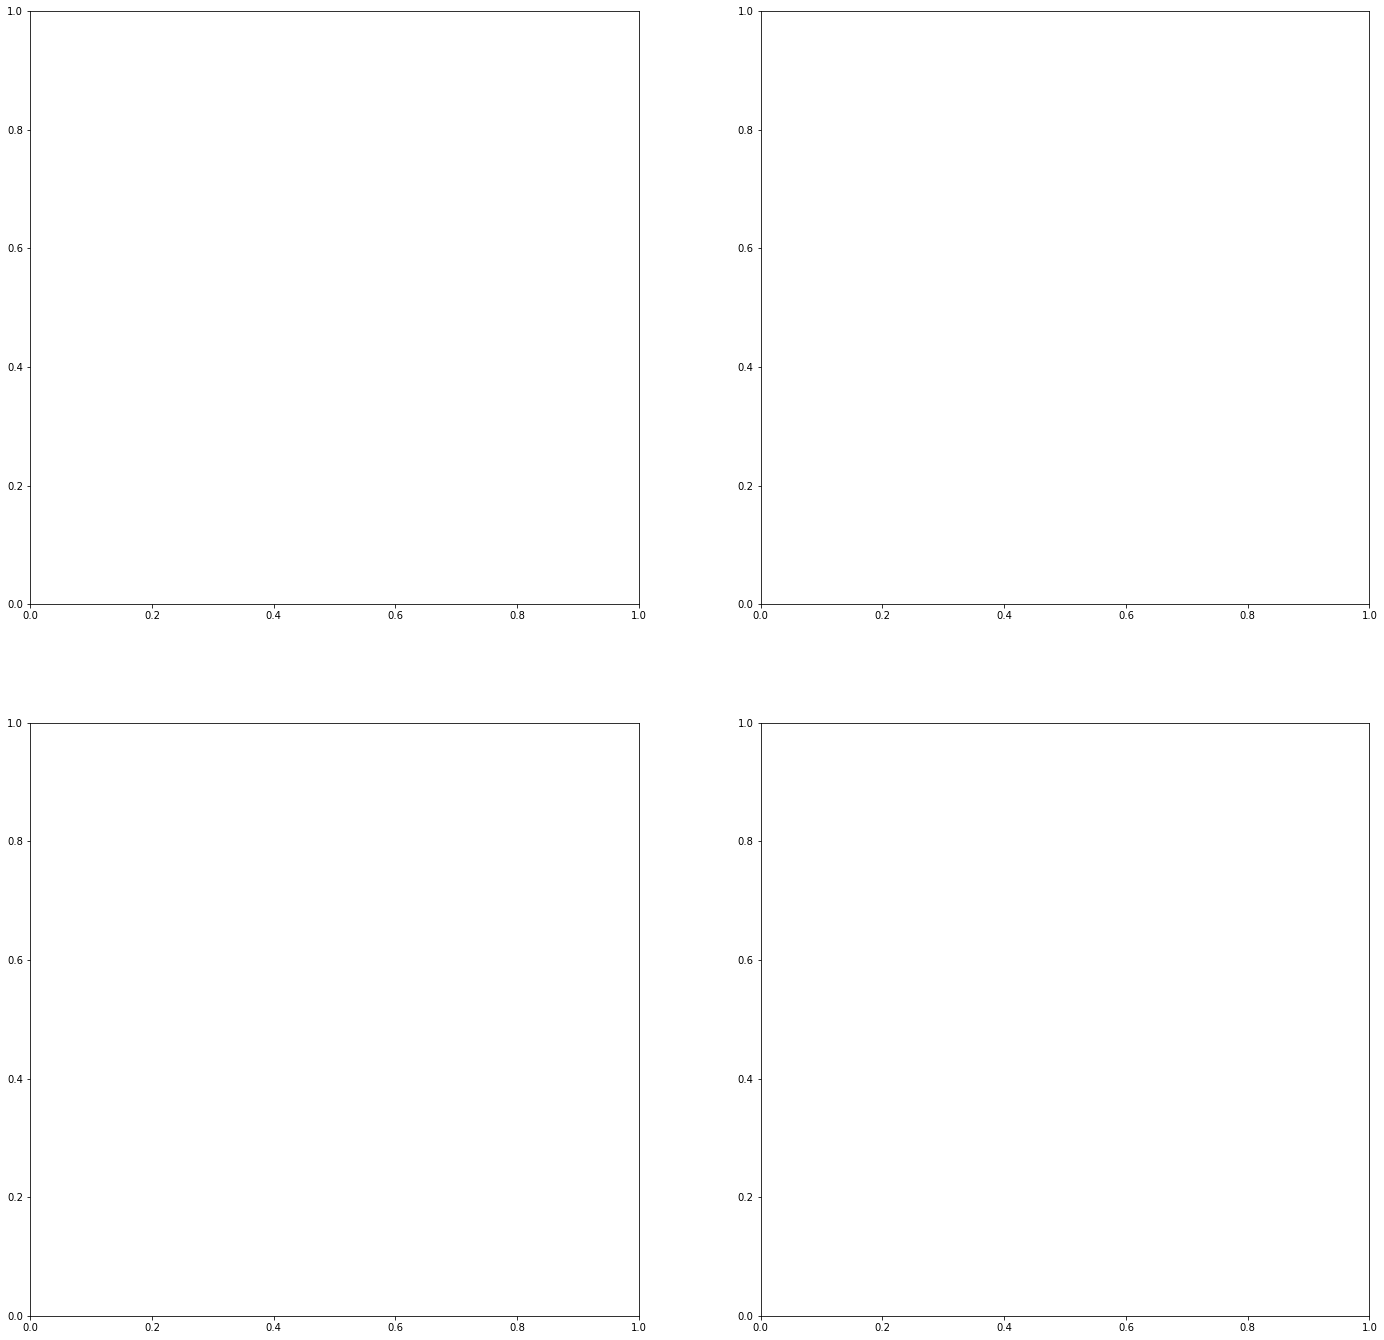

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(24,24))# Pedimos subfiguras con un renglón y dos columnas

Fíjense lo que tenemos ahora en el objeto `axes`

In [ ]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

Es un _array_ de 2x2 que tiene la misma forma de la figura. Para manejarlo más fácil, vamos a aplanar el _array_

In [ ]:
axes.ravel()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

Eso ya iene una sola dimensión y lo podemos usar de la misma forma que antes

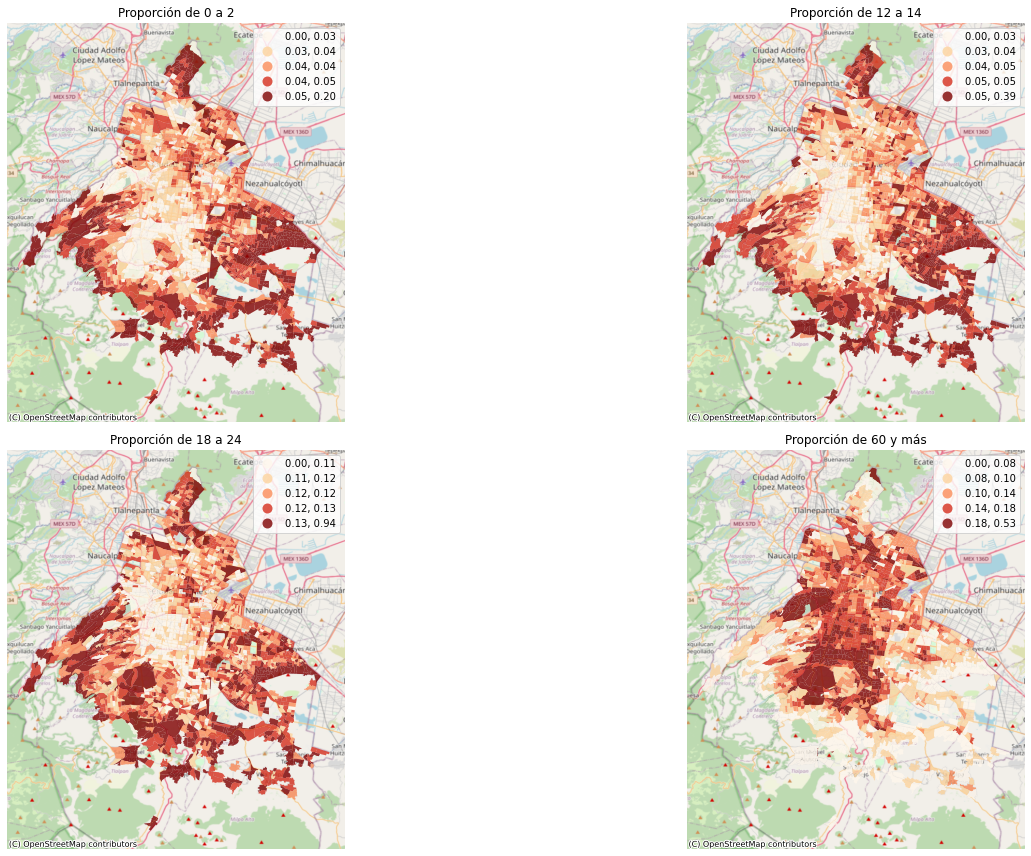

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(24,12))# Pedimos subfiguras con un renglón y dos columnas
axes = axes.ravel() # aplanamos el array
ageb_pob.plot('prop_0a2', legend=True, cmap='OrRd', scheme='quantiles', ax=axes[0], alpha=0.8)# Graficamos en el primer ax
axes[0].set_title("Proporción de 0 a 2") # Este título está en el nivel ax, no en el figure
axes[0].set_axis_off()
ctx.add_basemap(axes[0], source=ctx.providers.OpenStreetMap.Mapnik, crs=ageb_pob.crs.to_string())
ageb_pob.plot('prop_12a14', legend=True, cmap='OrRd', scheme='quantiles', ax=axes[1], alpha=0.8)# Graficamos en el segndo ax
axes[1].set_title("Proporción de 12 a 14") # Este título está en el nivel ax, no en el figure
axes[1].set_axis_off()
ctx.add_basemap(axes[1], source=ctx.providers.OpenStreetMap.Mapnik, crs=ageb_pob.crs.to_string())
ageb_pob.plot('prop_18a24', legend=True, cmap='OrRd', scheme='quantiles', ax=axes[2], alpha=0.8)# Graficamos en el segndo ax
axes[2].set_title("Proporción de 18 a 24") # Este título está en el nivel ax, no en el figure
axes[2].set_axis_off()
ctx.add_basemap(axes[2], source=ctx.providers.OpenStreetMap.Mapnik, crs=ageb_pob.crs.to_string())
ageb_pob.plot('prop_60ymas', legend=True, cmap='OrRd', scheme='quantiles', ax=axes[3], alpha=0.8)# Graficamos en el segndo ax
axes[3].set_title("Proporción de 60 y más") # Este título está en el nivel ax, no en el figure
axes[3].set_axis_off()
ctx.add_basemap(axes[3], source=ctx.providers.OpenStreetMap.Mapnik, crs=ageb_pob.crs.to_string())
plt.tight_layout() # Para disminuir el espacio entre gráficas
plt.show()